Warning: sometimes our graphs look bad because the resolution of the 
graph is poor.  This has a technical fix.  
Here are some pointers to getting graphics out of MATPLOTLIB that look good when imported into other programs.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# imports data from Nat1988.txt which is about 810 Mb
# and KEY1988.txt which is an ad-hoc table of columns and labels
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip 


In [8]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df
    for start, stop, column_name in datadictionary:
        pd[column_name] = pd.to_numeric(pd[column_name])

In [9]:
# Load in a file of three columns into a list of lists, the first two elements of which are integers.
# This is our table of column positions and column names
key1988 = []
for line in open("~/visualization-curriculum/KEY1988.txt"):
    fields = line.strip().split()
    key1988.append([int(fields[0]), int(fields[1]), fields[2]])
key1988


[[12, 12, 'RESIDENTSTATUS'],
 [13, 14, 'STATEOFRESIDENCE'],
 [21, 21, 'POPULATIONSIZECITY'],
 [35, 35, 'SEX'],
 [36, 36, 'ATTENDANTTYPE'],
 [37, 37, 'RACEOFFATHER'],
 [38, 38, 'RACEOFMOTHER'],
 [39, 39, 'RACEOFCHILD'],
 [40, 40, 'RACEOFCHILDRECODE3'],
 [41, 42, 'AGEOFMOTHER'],
 [60, 60, 'BIRTHORDERRECODE9'],
 [69, 70, 'AGEOFFATHER'],
 [77, 78, 'BIRTHWEIGHTRECODE12'],
 [80, 80, 'PLACEOFDELIVERY'],
 [81, 81, 'PLURALITY'],
 [84, 85, 'MONTH'],
 [86, 87, 'DAY'],
 [93, 94, 'DETAILGESTATIONAGE'],
 [98, 99, 'MOTHERSEDUCATION'],
 [103, 104, 'FATHERSEDUCATION'],
 [107, 107, 'DETAILMARITALSTATUS'],
 [181, 182, 'ONEMINUTEAPGAR'],
 [184, 185, 'FIVEMINUTEAPGAR'],
 [187, 188, 'HISPANICMOTHER'],
 [189, 190, 'HISPANICFATHER']]

In [10]:
# Read the large (215 x 3.9million cells) data file into a pandas frame 
n1988 = pd.read_csv("~/Downloads/birth/NATL1988.txt", header=None)

In [11]:
df = parse_natality(n1988, key1988)
df.head()

,RESIDENTSTATUS,STATEOFRESIDENCE,POPULATIONSIZECITY,SEX,ATTENDANTTYPE,RACEOFFATHER,RACEOFMOTHER,RACEOFCHILD,RACEOFCHILDRECODE3,AGEOFMOTHER,...,MONTH,DAY,DETAILGESTATIONAGE,MOTHERSEDUCATION,FATHERSEDUCATION,DETAILMARITALSTATUS,ONEMINUTEAPGAR,FIVEMINUTEAPGAR,HISPANICMOTHER,HISPANICFATHER
0,1,01,9,2,1,1,1,1,1,23,...,01,08,42,12,11,1,09,10,00,00
1,1,01,9,2,1,9,2,2,3,16,...,01,01,39,10,99,2,08,09,00,99
2,1,01,9,2,1,2,2,2,3,24,...,01,07,39,12,10,1,07,08,00,00
3,1,01,9,1,1,9,2,2,3,24,...,01,06,42,11,99,2,09,09,00,99
4,1,01,9,2,1,9,2,2,3,26,...,01,01,35,12,99,2,08,09,00,99


In [12]:
# looks like I need to groupby both ONEMINUTEAPGAR and FIVEMINUTEAPGAR
apgarapgarhist = df.groupby(["ONEMINUTEAPGAR", "FIVEMINUTEAPGAR"]).FIVEMINUTEAPGAR.count()


In [13]:
apgarapgar= np.reshape(np.array(apgarapgarhist), (12,12))
# chop off unknown apgar scores
apgarapgar = apgarapgar[0:11,0:11]

In [14]:
apgarapgar  # now it's just a numpy arary, so I don't have pandas 
# conveniences like .head()

array([[   1355,     404,     207,     162,     147,     104,      73,
             75,      89,     148,      46],
       [    741,    4699,    1109,    1324,    1624,    1915,    2298,
           2134,    2005,    1640,      80],
       [    183,     719,    1253,     747,    1339,    2089,    3011,
           3251,    3719,    3095,     140],
       [     47,     219,     276,     530,     792,    1978,    3656,
           5263,    6370,    5942,     249],
       [     13,      59,     104,     127,     444,    1215,    4209,
           7624,   11097,   11519,     400],
       [     15,      43,      80,     100,     120,     684,    3264,
          10986,   19157,   22156,     932],
       [     17,      34,      54,      78,     126,     214,    1595,
          11475,   38955,   47903,    2157],
       [     47,      39,      47,      63,      95,     215,     455,
           6028,   82434,  186829,    7623],
       [    151,      74,      69,      71,     153,     231,     410,
 

In [15]:
df.groupby(["ONEMINUTEAPGAR"]).count().bar()


KeyboardInterrupt



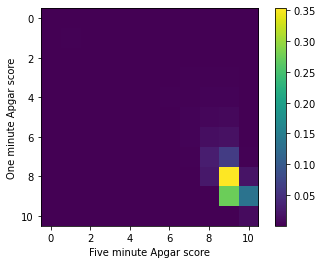

In [17]:

plt.imshow((apgarapgar/apgarapgar.sum())  )
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()


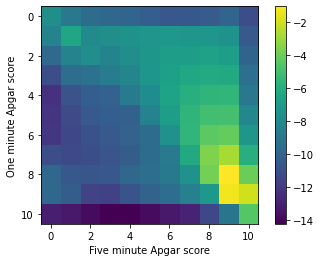

In [18]:
plt.imshow(np.log(apgarapgar/apgarapgar.sum())  )
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()


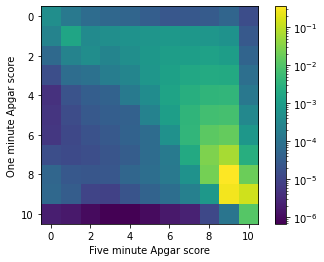

In [16]:
# Exaggerated-color scale version
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#  plt.savefig() claims to support PNG, EPS, PDF, and SVG, and does support JPG
#  It stands to reason they have different optional arguments (resolution, quality, metadata)
from matplotlib.colors import LogNorm

plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score"), plt.xlabel("Five minute Apgar score"); plt.colorbar()


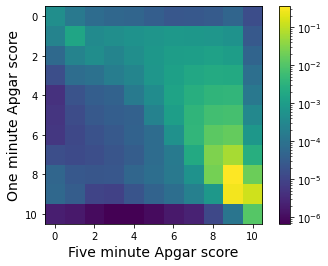

In [19]:
# first, bigger axis labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.colorbar()

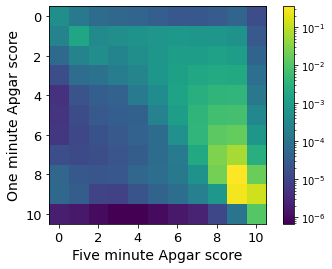

In [20]:
# Next, bigger axis tick marks
# first, bigger axis labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.colorbar()


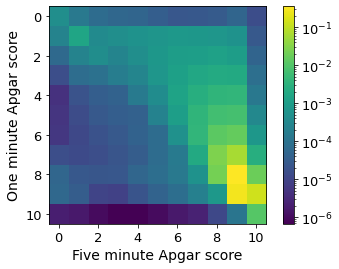

In [22]:
# Next, bigger color bar tick labels
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 

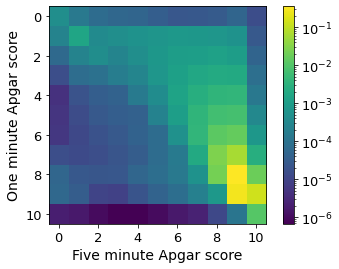

In [23]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR.png")

In [25]:
# savefig results in a below-presentation-standard graphic:
!exiftool APGAR.png
#  432 x 288 pixels!! No wonder it looks crummy.  

ExifTool Version Number         : 12.30
File Name                       : APGAR.png
Directory                       : .
File Size                       : 11 KiB
File Modification Date/Time     : 2022:10:11 13:40:24-05:00
File Access Date/Time           : 2022:10:11 13:41:12-05:00
File Inode Change Date/Time     : 2022:10:11 13:41:07-05:00
File Permissions                : -rw-r--r--
File Type                       : PNG
File Type Extension             : png
MIME Type                       : image/png
Image Width                     : 432
Image Height                    : 288
Bit Depth                       : 8
Color Type                      : RGB with Alpha
Compression                     : Deflate/Inflate
Filter                          : Adaptive
Interlace                       : Noninterlaced
Software                        : Matplotlib version3.5.1, https://matplotlib.org/
Pixels Per Unit X               : 2835
Pixels Per Unit Y               : 2835
Pixel Units                    

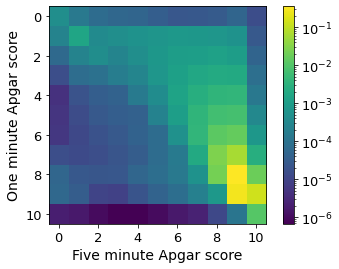

In [26]:
# Let us marginalize over output formats...
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR.jpg")
plt.savefig("APGAR.pdf")
plt.savefig("APGAR.svg")
plt.savefig("APGAR.png")
plt.savefig("APGAR.eps")

In [ ]:
!ls -lh APGAR.???
# So some are bigger than others.  
# Here JPG and PNG are bitmap formats,
# EPS and PDF are container formats that *can* contain 
# vector graphics if they are created properly, and 
# SVG is a vector format that isn't widely supported.

# Why create so many files?  To check which ones I can use
# downstream.

In [ ]:
# For my presentation software, I can import EPS and SVG.
# If I was completely stuck with the bitmap formats, 
# I could improve the quality by increasing the resolution:

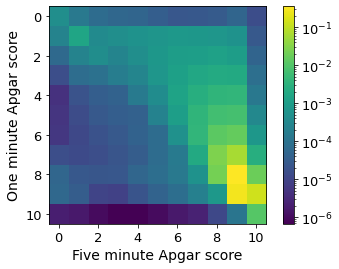

In [27]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR300.png", dpi=300)


In [ ]:
!exiftool APGAR300.png # and now it's 1800x1200 and 62kB
# It looks good enough for anywhere I am going to put it,
# but it is not infinitely zoomable like EPS or SVG.

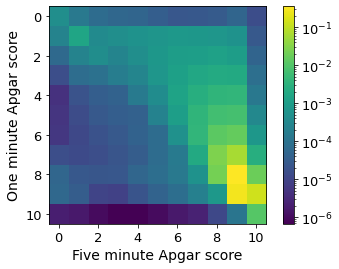

In [28]:
plt.imshow((apgarapgar/apgarapgar.sum()), norm=LogNorm())
plt.ylabel("One minute Apgar score", fontsize=14)
plt.xlabel("Five minute Apgar score", fontsize=14) 
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=13) 
plt.savefig("APGAR300.pdf", bbox_inches=0)
